In [3]:
import numpy as np
import matplotlib.pyplot as plt

def E_prime_f(W, E, Q_2, M_p):
    E_prime = E - (W**2 + Q_2 - M_p**2)/(2*M_p)
    # E_prime = (M_p**2+2*M_p*E -Q_2 - W**2)/(2*M_p)
    return E_prime

def theta_el_f(E, E_prime, Q_2):
    theta_el = 2*np.arcsin((Q_2/(4*E*E_prime))**0.5)
    return theta_el

def eps_f(nu, Q_2, theta_el):
    eps = (1+2*(1+nu**2/Q_2)*(np.tan(theta_el/2))**2)**(-1)
    return eps

def nu_f(E, E_prime):
    return E-E_prime

def MAID_cross_section_f(sigma_t, sigma_l, sigma_lt, sigma_tt, phi, eps):
    cross_section = sigma_t+eps*(sigma_l) + (2*eps*(1+eps))**0.5*sigma_lt*np.cos(phi) + eps*sigma_tt*np.cos(2*phi)
    return cross_section

E = 5.754
W = 1.23
Q_2 = 1.715
cos_theta = -0.5
M_p = 0.938

E_prime=E_prime_f(W=W, E=E, Q_2=Q_2, M_p=M_p)

eps = eps_f(nu=nu_f(E=E, E_prime=E_prime),
            Q_2=Q_2,
            theta_el=theta_el_f(E=E, E_prime=E_prime, Q_2=Q_2))

phi_r = np.arange(start=0, stop=2*np.pi, step=0.1)

theta_el = theta_el_f(E=E, E_prime=E_prime, Q_2=Q_2)

print(f'W:{W}')
print(f'Q2:{Q_2}')
print(f'E_prime:{E_prime}')
print(f'theta_el:{theta_el*180/np.pi}')
print(f'theta:{np.arccos(cos_theta)*180/np.pi}')
print(f'eps:{eps}')

W:1.23
Q2:1.715
E_prime:4.502371002132196
theta_el:14.782720917530039
theta:120.00000000000001
eps:0.939496039085786


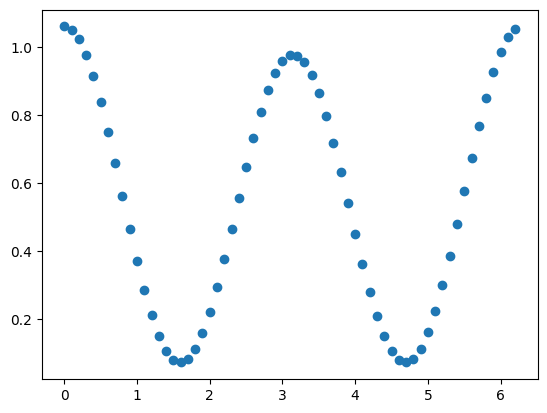

In [2]:
# 5.754, 1.23, 2.915, -0.7
sigma_t = 0.5043 
sigma_l = 0.0447
sigma_tt = -0.1699
sigma_lt = 0.0216

# 5.754, 1.23, 2.915, -0.1
# sigma_t = 0.7566
# sigma_l = 0.0207
# sigma_tt = -0.3441
# sigma_lt = -0.0236

# 5.754, 1.53, 1.715, 0.1
# sigma_t = 0.9243
# sigma_l = 0.0512
# sigma_tt = -0.1758
# sigma_lt = -0.0813

MAID_cross_section = []
for phi in phi_r:
    MAID_cross_section.append(MAID_cross_section_f(sigma_t=sigma_t, sigma_l=sigma_l, sigma_lt=sigma_lt, sigma_tt=sigma_t, phi=phi, eps=eps))

plt.scatter(phi_r, MAID_cross_section)